In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 100

In [2]:
berichte = pd.read_csv(r"../out/Polizeiberichte.csv", sep=";", encoding="UTF-8")

In [3]:
berichte.head()

,Timestamp,Headline,Hauptartikel,Link,Date,Location,Location2,Beschreibung,Place,Author
0,2019-04-24 12:48:00,Raub auf Bekleidungsgeschäft,"Ein bislang unbekannter Täter betrat am Dienstag, den 23. April 2019, gegen 13.30 Uhr, ein Bekl...",https://www.presseportal.de/blaulicht/pm/4970/4253254,2019-04-24 00:00:00,Sachsenhausen,NaN,Frankfurt (ots) (fue),Frankfurt,fue
1,2019-04-24 12:05:00,Graffiti gemalt und Drogen zu Hause,Ein junger Mann im Alter von 23 Jahren und sein bislang unbekannter Begleiter sind am Montag vo...,https://www.presseportal.de/blaulicht/pm/4970/4253182,2019-04-24 00:00:00,Bockenheim,Innenstadt,Frankfurt (ots) (ne),Frankfurt,ne
2,2019-04-24 11:48:00,Verdacht der CO-Vergiftung durch Shisharauchen,Drei Frauen und ein Mann sind gestern Nachmittag mit Verdacht auf Kohlenmonoxid-Vergiftung in K...,https://www.presseportal.de/blaulicht/pm/4970/4253146,2019-04-24 00:00:00,Goldstein,NaN,Frankfurt (ots) (ne),Frankfurt,ne
3,2019-04-23 14:53:00,Versuchtes Tötungsdelikt,Am Ostersonntag (21.04.2019) wurde einem 26-jährigen Mann im Schlaf schwere Kopfverletzungen zu...,https://www.presseportal.de/blaulicht/pm/4970/4252376,2019-04-23 00:00:00,Gallus,NaN,Frankfurt (ots) (em),Frankfurt,em
4,2019-04-23 14:37:00,Streit um Parkplatz endet in tätlichem Angriff,"Am Karfreitag (19.04.2019) endete ein Streit zweier Frauen um einen Parkplatz, für einen der be...",https://www.presseportal.de/blaulicht/pm/4970/4252342,2019-04-23 00:00:00,Fechenheim,NaN,Frankfurt (ots) (em),Frankfurt,em


In [4]:
# Make timestamps datetime
berichte["Timestamp"] = pd.to_datetime(berichte["Timestamp"])
berichte["Date"] = pd.to_datetime(berichte["Date"])

In [5]:
# Calculate differences between time of occurence (Date) and time of publishing (Timestamp)
publishing_delay = berichte["Timestamp"].dt.date - berichte["Date"].dt.date
publishing_delay.describe()

count                        539
mean     38 days 05:57:59.777365
std      87 days 07:09:46.322923
min          -148 days +00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%             30 days 00:00:00
max            294 days 00:00:00
dtype: object

In [6]:
# How many articles did each author publish?
berichte["Author"].value_counts()

em               145
fue              120
ka               117
ne                77
mc                31
md                 8
pe                 7
hol                5
me                 5
hs                 3
ki                 2
72                 1
GER                1
kam                1
ab                 1
ots                1
03.04.2019         1
3.3.2019           1
em/gf              1
em/ki              1
12.04.2019         1
Ki                 1
Schutzzone         1
BMJV               1
Ankunftsebene      1
2019               1
neu                1
Name: Author, dtype: int64

In [7]:
berichte[berichte["Author"]=="(ne)"]["Link"]

Series([], Name: Link, dtype: object)

In [8]:
# Determine number of published articles per author and location
authors_locations_data = berichte[["Author", "Location"]]
authors = berichte["Author"].unique()

pub_counts_per_author_and_location = pd.DataFrame(index=berichte["Location"].unique())

for author in authors:
    pub_counts_per_author_and_location[author] = authors_locations_data[authors_locations_data["Author"]==author].groupby(by="Location").count()
    
pub_counts_per_author_and_location.replace({np.nan: 0}, inplace=True)

In [9]:
# Counts of published articles by location for an example author
example_author = pub_counts_per_author_and_location.columns[1]
print("Published articles for author {} by location".format(example_author))
pub_counts_per_author_and_location[example_author][pub_counts_per_author_and_location[example_author]!=0].sort_values().plot(kind="bar")

Published articles for author ne by location


In [10]:
# Top locations for each author
top_locations_by_author = pd.DataFrame(index=[1,2,3])
for author in pub_counts_per_author_and_location.columns:
    top_locations_by_author[author] = pub_counts_per_author_and_location[author].nlargest(n=3).index.sort_values()
top_locations_by_author

,fue,ne,em,ka,12.04.2019,nan,neu,Schutzzone,pe,ots,...,hol,Ki,3.3.2019,BMJV,Ankunftsebene,kam,em/ki,em/gf,ab,GER
1,Bundesautobahn,Bornheim,BAB,Bahnhofsviertel,Bockenheim,Bockenheim,Bockenheim,Bockenheim,Bahnhofsviertel,Bockenheim,...,Bockenheim,Bockenheim,Bockenheim,Bockenheim,Bockenheim,Bockenheim,Bockenheim,Bockenheim,Bockenheim,Bockenheim
2,Sachsenhausen,Nordend,Innenstadt,Gallus,Goldstein,Goldstein,Maintal,Innenstadt,Bornheim,Marburg,...,Ostend,Flughafen,Goldstein,Goldstein,DinslakenDuisburg,Sachsenhausen,Goldstein,Goldstein,Sachsenhausen,Goldstein
3,Stadtgebiet,Westend,Sachsenhausen,Innenstadt,Sachsenhausen,Sachsenhausen,Sachsenhausen,Sachsenhausen,Dornbusch,Sachsenhausen,...,Sachsenhausen,Sachsenhausen,Sachsenhausen,Sachsenhausen,Sachsenhausen,Unterliederbach,Sachsenhausen,Sachsenhausen,Sindlingen,Sachsenhausen


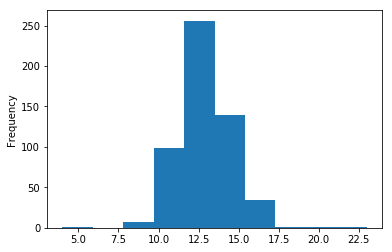

In [11]:
# At which times are articles published?
pub_hours = berichte["Timestamp"].dt.hour
pub_hours.plot(kind="hist")